In [1]:
import numpy as np
import matplotlib.pyplot as plot 
import scipy
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
#Units conversion from geometrical units

G = 6.67*10**(-11)
c = 3*10**8
k = (c**2)/G
k1 = (((10**-3))/(k*(1.98*10**30)))

In [3]:
#loading the data

df = pd.read_csv("data from plotanalyser.csv")

In [4]:
#Converting the data fromm 

fpeak  = df['fpeak'].to_numpy()
m_Xaxis = (df["(M/R^3)^1/2"].to_numpy())
fpeak , m_Xaxis

(array([1.83825465, 2.09968526, 2.00830711, 2.18742012, 2.21046257,
        2.39811159, 2.525732  , 2.65661421, 2.63895088, 2.53894134,
        2.88044826, 2.80630424, 3.31563186, 3.45515498, 3.492103  ]),
 array([0.05446346, 0.06096341, 0.0618289 , 0.06564959, 0.06404527,
        0.06800013, 0.07295565, 0.07503507, 0.07891388, 0.0803141 ,
        0.08521227, 0.08520897, 0.09312465, 0.09460245, 0.09547366]))

In [5]:
#Curve fit

def function(m_Xaxis , a ,b):
    return a*m_Xaxis + b

coeffs, cov = curve_fit(function,m_Xaxis,fpeak)

A,B = coeffs
A,B

(38.24889509836317, -0.2927097279270208)

In [6]:
#Defining the Mtot

def Mtot1(m1,q):
   return m1*(1 + q)

q = [0.7,0.8,0.85,0.9,1]
m1 = [1.3,1.4,1.5]

Mtot = []

for i in q:
    for j in m1:
       Mtot.append(Mtot1(q = i ,m1 = j)*1.470588)#Scaling factor

Mtot


[3.24999948,
 3.49999944,
 3.7499993999999996,
 3.4411759200000005,
 3.70588176,
 3.9705876000000004,
 3.5367641400000003,
 3.80882292,
 4.080881700000001,
 3.6323523599999996,
 3.9117640799999998,
 4.1911758,
 3.8235288,
 4.1176464,
 4.411764]

In [7]:
#Defining the EoS: k = 0.05 , GA = 2  value and Rmax = 9.745957117909718km
 
def formula(Mtot1 , Rmax):
   return (38.24889509836317)*((Mtot1/(Rmax)**3)**0.5) - 0.2927097279270208
    

fpeak = []
#k = (G/c**2)

for i in Mtot:
 fpeak.append(formula(Mtot1 = i , Rmax = 9.745957117909718))   

fpeak

[1.9736236533789415,
 2.0591755703799817,
 2.141722837900901,
 2.0393280822042428,
 2.1273602785356887,
 2.2123007160589965,
 2.07149564052384,
 2.1607421314079693,
 2.246854216520288,
 2.103231360777357,
 2.193675844740304,
 2.280943848488135,
 2.1654739619550067,
 2.258268044566503,
 2.347803127241464]

Text(0.5, 0, '$M_{tot}$')

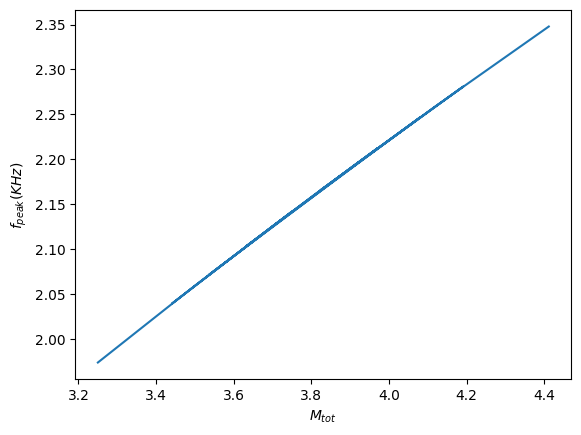

In [8]:
#Plotting 
plot.plot(Mtot,fpeak)
plot.ylabel("$f_{peak} (KHz)$")
plot.xlabel("$M_{tot}$")

In [9]:
#fpeak from Vretinaris numerical simulation paper (R_1.4)

def Mchirp1(m1,q):
    return ((q*(m1**2))**(3/5))/((m1+q*m1)**1/5)

def empirical_relation(Mchirp,R):
    b0 = 14.819 
    b1 = -1.474
    b2 = -1.43
    b3 = 0.414
    b4 = -0.0
    b5 =  0.043
    return b0 + b1*Mchirp + b2*(Mchirp**2) + b3*(Mchirp*R) + b4*(Mchirp*R**2) + b5*(Mchirp**2*R)


In [10]:
#Defining the Mchirp

q = [0.7,0.8,0.85,0.9,1]
m1 = [1.3,1.4,1.5]

Mchirp = []

for i in q:
    for j in m1:
       Mchirp.append(Mchirp1(q = i ,m1 = j))
(Mchirp)

[2.5024682577279274,
 2.5398350610638367,
 2.5751240729642064,
 2.5605906886690457,
 2.5988253749200227,
 2.634934010865902,
 2.583677492013523,
 2.622256909925956,
 2.6586911086339002,
 2.6034580218681116,
 2.6423328022358628,
 2.6790459396880957,
 2.6346848801544587,
 2.674025939312672,
 2.7111794279942467]

In [11]:
#Polytrope kappa = 0.05, Pc = 8.32199 , GA = 2,    R_1.4 = 21.489485069694197km

fpeak = []

for i in Mchirp:
  fpeak.append(empirical_relation( Mchirp = i  , R = 21.489485069694197))

fpeak

[30.225489981153498,
 30.40752171544284,
 30.578134287824934,
 30.508022031059262,
 30.69201610507121,
 30.86442094158093,
 30.619297960136286,
 30.804042954697078,
 30.977132354658796,
 30.714208987392997,
 30.899584454987174,
 31.073248016012236,
 30.863235958364136,
 31.049582486092806,
 31.224129227721463]